### Problem 1 - Buffon's needle 1

experiment_data = [3, 3, 3, 3, 3, 4, 6, 5, 3, 3]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
class buffon_needle:
    """This class approximate 1/pi using a Monte Carlo Simulation. 
    It computes the fraction of success for a large number of trials conducted following the buffon needle experiment.
    
    Methods:
    run_experiment - Runs the buffon needle experiment n times
    esti_pi - Estimate pi from the outcome of the buffon needle experiment
    plot-error - Plots the log error and the log trails of the experiment
    
    Attributes:
    trails : int
        The number of trails to run the experiment
    outcome : list
        The individual outcomes for each trail
    pi : float
        The estimated value of pi after all the trails
    """
    
    def __init__(self, trails):
        self.trails = trails
        self.outcome = self.run_experiment()
        self.pi = self.esti_pi()
  
        
    def run_experiment(self):
        """Runs the buffon needle experiment forr trails number of times. 
        d = 2L
        L = 1
        By having the length be equal to one, the computation simplifies"""
        
        #distance from the center point to the line. D = 2, thus sample from (0,1)
        line_dist = np.array(np.random.random(size = self.trails))
        
        #the length of the needle in y-direction. The hypothenus is 1/2 since L = 1
        y_length = np.sin(np.random.uniform(0, np.pi, size = self.trails))/2
        
        #Compute the outcome
        outcomes = line_dist <= y_length
        
        return outcomes
    
    def esti_pi(self):
        """Estimate pi """
        
        #1/pi = mean(outcome) -> pi = 1/mean(outcome)
        esti_pi = 1/np.mean(self.outcome)
        
        return esti_pi
    
    def plot_error(self):
        """Plots the log error for log number of trails.
        It corrects for the possible 0 outcomes in the beginning by removing them when computing log error"""
        
        #List of cumulative outcomes 
        trail_count = np.cumsum(self.outcome)
        
        #The number of trails
        trail_nr = np.arange(1, self.trails+1, 1)
        
        #indicator for number of 0's in the beginning. 
        i = 0
        
        #counts the number of 0 outcomes in the beginning
        while trail_count[i] == 0 and i < len(trail_count):
            i += 1
        
        #compute the estimated pi for each number of trails (Excluding the first trails with 0 as outcome)
        pi_est = 1/np.divide(trail_count[i:], trail_nr[i:])
        
        #Compute the error at each trial
        error = np.abs(np.pi-pi_est)
        
        #Appends i number of pi's in the beginning to account for the removed zeros
        error = np.append(np.full(i, np.pi), error)
        
        #Plot the log of every 10th datapoint
        plt.plot(np.log10(trail_nr[::10]), np.log10(error[::10]))
        
        plt.xlabel("Number of trails (log_10)")
        plt.ylabel("Error (log_10)")
        plt.title("Error of estimated value of pi from the Buffon needle experiment ")
        plt.show()

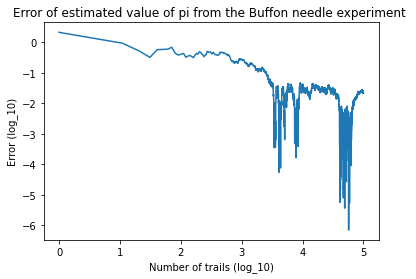

In [3]:
sim = buffon_needle(100000)

sim.plot_error()

### Problem 2

In [4]:
def experiment(trails):
    """Runs an experiment with the number of trails and returns the estimated pi value"""
    sim = buffon_needle(trails)
    
    return sim.esti_pi()

In [5]:
#10000 experiments with 200 trails
super_10000 = [experiment(200) for _ in range(10000)]

#1000 experiments with 2000 trails
super_1000 = [experiment(2000) for _ in range(1000)]

#100 experiments with 20000 trails
super_100 = [experiment(20000) for _ in range(100)]

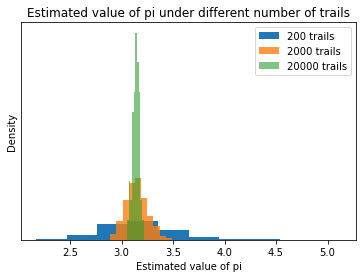

In [6]:
#Plot the estimated pi levels. Should be normally distributed
plt.hist(super_10000, density = True, label = "200 trails")
plt.hist(super_1000, density = True, label = "2000 trails", alpha = 0.8)
plt.hist(super_100, density = True, label = "20000 trails", alpha = 0.6)

#Add title, legend, and axis labels
plt.xlabel("Estimated value of pi")
plt.title("Estimated value of pi under different number of trails")
plt.yticks([], [])
plt.ylabel("Density")

plt.legend()
plt.show()

### Problem 3

In [7]:
class order_stats:
    """This class computes and plots a list of kth order statistics from array of size n 
    and the corresponding proved beta function
    It does so by first finding trails number of samples of the kth's order statistics from a list of size n.
    it then plots histograms of the order statistics and the corresponding beta functions
    
    Methods;
    get_stats - Finds the order statistics samples
    plot_dist - Plots the distribution of the sample statistics for each k and the corresponding beta function
    
    Attributes:
    trails : int
        the number of order statistics to take
    n : int
        Size of each list
    k : list
        List of order statistics
    """
    def __init__(self, trails = 1000, n = 9, k = np.array([1, 3, 5])):
        self.trails = 1000
        self.n = n
        self.k = k
        self.k_sample = self.get_stats()
        
    def get_stats(self):
        """Gets the sample statistics
        Starts by sampling "trails" number of arrays of size n from a uniform distribution from 0,1
        It then sorts each sample array and extracts the kth's number from each array
        """
        sample = np.sort(np.random.random(size = (self.trails, self.n)))[:, self.k-1] #self.k-1 because sample with index starting from 0
        
        return sample
        
    def plot_dist(self):
        """Plot the distribution for each order statistics and the corresponding beta function"""
        
        #loop through each k
        for i in range(self.k.shape[0]):
            
            #plot the distribution of kth order statistics with bin size 25
            plt.hist(self.k_sample[:, i], density = True, bins = 25, label = "Order statistics")
            
            #plot the pdf for the corresponding beta function beta function
            plt.plot(np.linspace(0,1,100), sts.beta(self.k[i], self.n + 1 - self.k[i]).pdf(np.linspace(0,1,100)), label = "Beta function")
            
            #title and legend
            plt.title(f"order statistics with n = {self.n} and k = {self.k[i]}")
            plt.legend()
            plt.show()
            
            

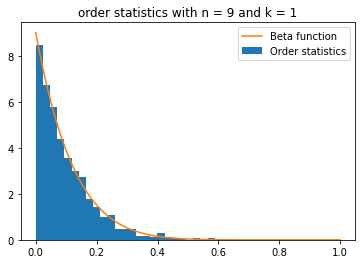

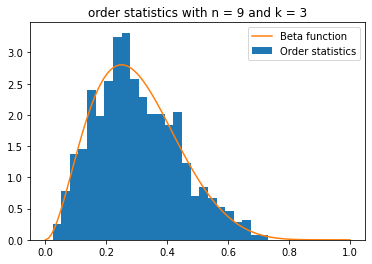

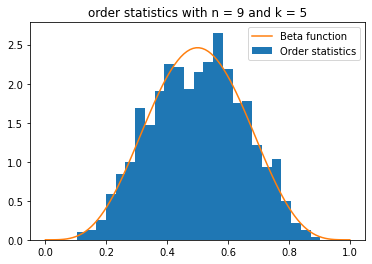

In [8]:
sim = order_stats()
sim.plot_dist()

### Problem 4

In [9]:
def sim_invarant_dist(matrix, iterations = 200):
    """This function simulate the markov chain for a transition matrix MxM.
    It returns the final state (invariant distribution) and the transition states"""
    
    #Transition matrix = matrix
    p = matrix
    
    #List of visited states
    states = []
    
    #Append initial state
    #Sample of simplex from a uniform dirichlet distribution to represent random starting point
    states.append(np.random.dirichlet(np.ones(matrix.shape[0])))
    
    #Append the next state the visited states
    for _ in range(iterations):
        
        #Dot product between the most recent state and the transition matrix
        states.append(states[-1].dot(p)) 
        
    return np.array(states)

def com_inv_dist(matrix):
    """This function computes the invariant distribution for transition matrix p"""
    
    #Transition matrix = matrix
    p = matrix
    
    #Compute the eigen vector and the eigen values
    eig_val, eig_vec = np.linalg.eig(p.transpose())
    
    #Find the index of eigenvalue closes to 1
    ind = np.abs(eig_val - 1).argmin()
    
    #Assign the eigenvector with same index to eigenvalue = 1
    eig_vec = eig_vec[:, 2]
    
    #Normalize the eigen vector
    norm_eig_vec = eig_vec/np.sum(eig_vec)
    
    return norm_eig_vec

def plot_states(states):
    """This function plots the visited states for 1 simplex"""
    
    #One plot for each possible state
    for i in range(len(states[0])):
        
        #Plot all the probabilities for the ith position state
        plt.hist(states[:, i], density = True, bins = 25)
        plt.title(f"Probability of state {i+1} throughout the simulation")
        plt.xlabel("p")
        plt.axvline(x=states[0, i], label = "Initial probability")
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        plt.show()
    return

def plot_inv_dist(matrix):
    """Plots the distribution of invariant distribution obtained by simulating and the computed distribution"""
    
    p = matrix
    
    #Simulate 50 invariant distributions
    sim_inv = np.array([sim_invarant_dist(p)[-1] for _ in range(50)])
    
    #Compute the invariant distribution
    comp_inv = com_inv_dist(p)
    
    for i in range(len(comp_inv)):
        
        #Plot all the invariant distribution for state i
        #Set the range to be cenered around the computed value
        plt.hist(sim_inv[:, i], density = True, bins = 25, 
                 label="Simulated", range=[comp_inv[i]-0.025, comp_inv[i]+0.025], alpha = 0.4, color = "red", align='mid')
        
        #Computed values
        plt.axvline(x=comp_inv[i], label = "Computed", alpha = 1)        
        
        #legend and titles
        plt.title(f"Invariant distribution for state {i+1}")
        plt.xlabel("p")
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        
        plt.show()

In [10]:
#define the matrix
c_0 = 1 - 1/2*np.exp(-3)
c_2 = 1 - 1/2 - 1/2*np.exp(-1)
c_3 = 1 - 1/2*np.exp(-1)
p = np.array([[c_0, 1/2*np.exp(-3), 0, 0],
             [1/2, 0, 1/2, 0],
             [0, 1/2*np.exp(-1), c_2, 1/2],
             [0, 0, 1/2*np.exp(-1), c_3]])

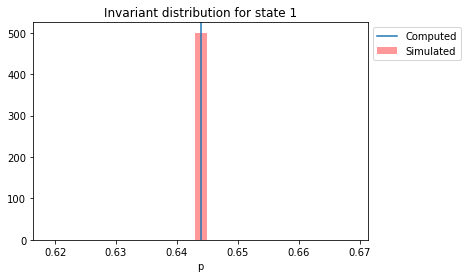

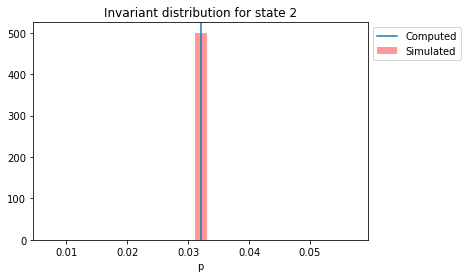

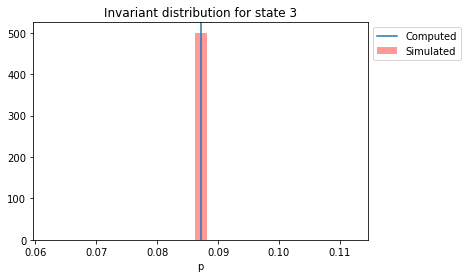

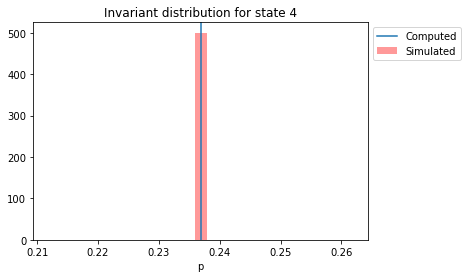

In [11]:
plot_inv_dist(p)

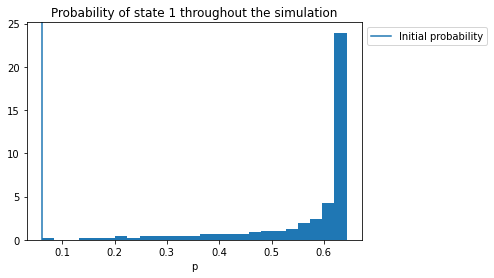

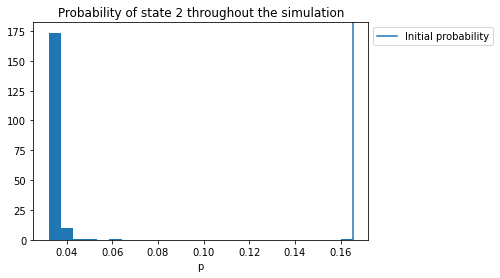

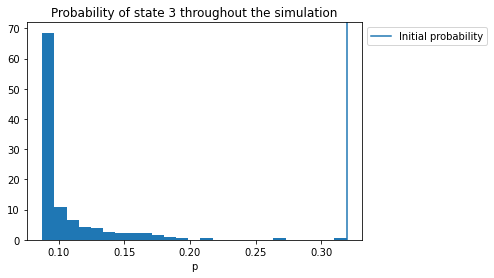

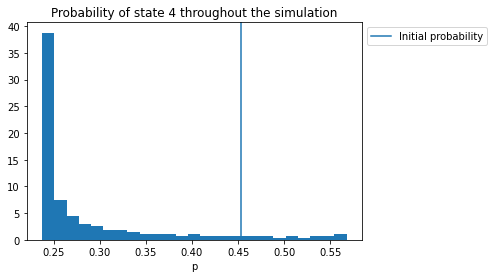

In [12]:
plot_states(sim_invarant_dist(p))